1 - Reading and Cleaning the Data

In [1]:
#Import necessary libraries
import sqlite3
import pandas as pd
import numpy as np

#Establish a connection to the SQLite database
con = sqlite3.connect(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Zomato\Resources/zomato_rawdata.sqlite")

In [2]:
df = pd.read_sql_query("SELECT * FROM USERS", con)

In [3]:
df["rate"].replace(("NEW", "-"), np.nan, inplace= True)

C:\Users\omerf\AppData\Local\Temp\ipykernel_14016\4275000964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rate"].replace(("NEW", "-"), np.nan, inplace= True)


In [4]:
df["rate"] = df["rate"].apply(lambda x: float(x.split("/")[0]) if type(x) == str else x)

In [5]:
#Handle missing values in rest_type column
df["rest_type"].isnull().sum()

data = df.dropna(subset=["rest_type"])

In [6]:
#Data is huge so will do text analysis for particular restaurant
quick_bites = data[data["rest_type"].str.contains("Quick Bites")]

In [7]:
#Apply operations to reviews_list

quick_bites["reviews_list"] = quick_bites["reviews_list"].apply(lambda x : x.lower()) 


C:\Users\omerf\AppData\Local\Temp\ipykernel_14016\2533730529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites["reviews_list"] = quick_bites["reviews_list"].apply(lambda x : x.lower())


In [8]:
#Remove all the special words , speacial characters
from nltk.corpus import RegexpTokenizer

tokenizer = RegexpTokenizer("[a-zA-Z]+") 

In [9]:
tokenizer.tokenize(quick_bites["reviews_list"][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [10]:
sample = data[0:10000]

In [11]:
reviews_tokens = sample["reviews_list"].apply(tokenizer.tokenize)

2 - Remove Stopwords from Data

In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords = stopwords.words("english")

In [14]:
#Adding new words to stopwords list
stopwords.extend(["rated", "n", "nan", "x", "RATED", "Rated"])
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#Apply a lambda function to remove stopwords
review_tokens_cleaned = reviews_tokens.apply(lambda review : [token for token in review if token not in stopwords])

3 - Unigram Analysis


In [16]:
total_reviews_2D = list(review_tokens_cleaned)

In [ ]:
#2D to 1D
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

total_reviews_1D

In [18]:
from nltk import FreqDist

fd = FreqDist()

In [19]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

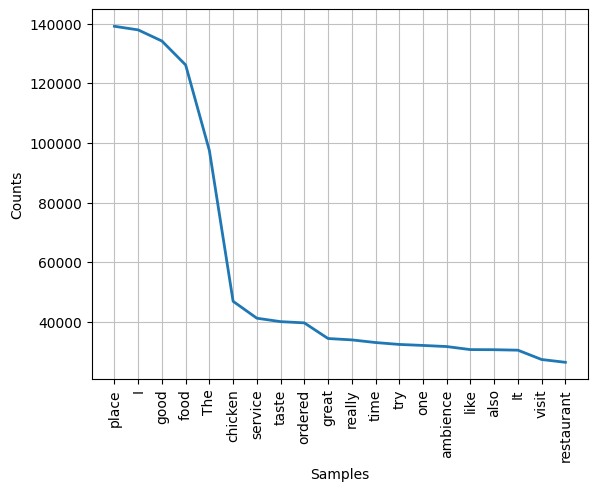

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
#Plot most common 20 words
fd.plot(20)